# 공정 데이터 T-sne 시각화 (multi-class data)

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib
from sklearn.manifold import TSNE
#한글꺠짐 방지
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False

In [2]:
data=pd.read_csv("./data/class_imbalance.csv", encoding="EUC-KR")

In [3]:
data

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X466,X467,X468,X469,X470,X471,X472,X473,X474,Y
0,0.469231,0.589292,0.499096,0.379841,0.000609,0.328562,0.965785,0.665019,0.542479,0.358362,...,0.132828,0.709375,0.012325,0.017510,0.011880,0.320455,0.173076,0.155193,0.135182,-1
1,0.575003,0.445535,0.666763,0.393982,0.000133,0.428942,0.969673,0.656639,0.412315,0.228669,...,0.282386,0.753125,0.034637,0.036965,0.033099,0.221387,0.220339,0.181159,0.282386,-1
2,0.400385,0.466998,0.543479,0.244894,0.000574,0.469123,0.946345,0.638590,0.319564,0.359499,...,0.100153,0.662500,0.009137,0.007782,0.008734,0.309942,0.152542,0.123188,0.100153,-1
3,0.471367,0.500400,0.678327,0.357067,0.000765,0.387631,0.960342,0.670606,0.392050,0.315131,...,0.132828,0.068750,1.000000,1.000000,1.000000,0.309942,0.152542,0.123188,0.100153,-1
4,0.331115,0.398566,0.678327,0.357067,0.000765,0.387631,0.960342,0.725612,0.546376,0.459613,...,0.059687,0.534375,0.027412,0.026265,0.026809,0.426901,0.155150,0.152174,0.059687,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,0.399847,0.487094,0.572412,0.264478,0.000452,0.736095,0.954899,0.723893,0.342946,0.398180,...,0.000000,0.606250,0.019975,0.017510,0.019384,0.136174,0.112125,0.105072,0.000000,1
1563,0.505195,0.518780,0.440488,0.260924,0.000532,0.437290,0.966563,0.463043,0.387373,0.331058,...,0.071478,0.946875,0.020824,0.019455,0.019500,0.393484,0.165580,0.177536,0.071478,1
1564,0.340233,0.462970,0.516596,0.386526,0.001531,0.536231,0.955677,0.580791,0.395168,0.352673,...,0.132828,0.596875,0.012325,0.019455,0.012026,0.289891,0.114733,0.101449,0.091956,1
1565,0.701244,0.392459,0.584457,0.418944,0.000724,0.275556,0.937792,0.894499,0.199532,0.332196,...,0.119561,0.759375,0.028049,0.023346,0.026822,0.375940,0.280313,0.235507,0.119561,1


In [4]:
#X,Y 분할
Y=data["Y"].copy()
X=data.drop("Y",axis=1)
X.head(3)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X465,X466,X467,X468,X469,X470,X471,X472,X473,X474
0,0.469231,0.589292,0.499096,0.379841,0.000609,0.328562,0.965785,0.665019,0.542479,0.358362,...,0.159274,0.132828,0.709375,0.012325,0.017510,0.011880,0.320455,0.173076,0.155193,0.135182
1,0.575003,0.445535,0.666763,0.393982,0.000133,0.428942,0.969673,0.656639,0.412315,0.228669,...,0.181159,0.282386,0.753125,0.034637,0.036965,0.033099,0.221387,0.220339,0.181159,0.282386
2,0.400385,0.466998,0.543479,0.244894,0.000574,0.469123,0.946345,0.638590,0.319564,0.359499,...,0.123188,0.100153,0.662500,0.009137,0.007782,0.008734,0.309942,0.152542,0.123188,0.100153


In [5]:
X_embedded = TSNE(n_components=2,init='random').fit_transform(X)

C:\Users\jkchoi\miniconda3\envs\ADD\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


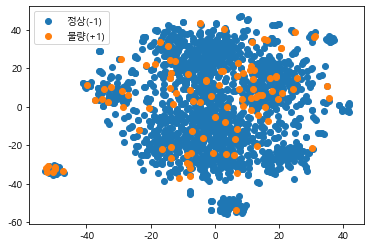

In [6]:
from matplotlib import pyplot as plt
plt.scatter(X_embedded[Y ==-1,0], X_embedded[Y==-1,1],label = '정상(-1)')
plt.scatter(X_embedded[Y ==1,0], X_embedded[Y==1,1],label = '불량(+1)')
plt.legend()
plt.show()

# 공정 데이터 T-sne 시각화 (multi-class data)

In [7]:
df = pd.read_csv('./data/Multiclass_data.csv')
df.head()

,Class,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60
0,HBRG,4.486201,7.522693,0,19.265581,0.0,0.0,0,0.0,4.37144,...,2.247654,1.272134,0.0,0,2.836458,0.0,4.834460,0,1.642702,0
1,HBRG,0.000000,7.836708,0,18.327251,0.0,0.0,0,0.0,0.00000,...,0.000000,0.000000,0.0,0,0.000000,0.0,5.025198,0,0.000000,0
2,HBRG,0.000000,7.439930,0,21.020445,0.0,0.0,0,0.0,0.00000,...,0.000000,0.000000,0.0,0,2.424664,0.0,5.706630,0,0.000000,0
3,HBRG,0.000000,18.827015,0,15.553238,0.0,0.0,0,0.0,0.00000,...,0.000000,1.934435,0.0,0,3.018529,0.0,5.741382,0,0.000000,0
4,HBRG,0.188557,17.855667,0,16.108568,0.0,0.0,0,0.0,0.00000,...,0.000000,1.704666,0.0,0,2.579150,0.0,3.234617,0,0.000000,0


In [8]:
X = df.drop(["Class"],axis=1)
Y = df["Class"]
Y.value_counts()

SPOT        1140
RING         824
LSAC         268
BRG          137
L_MKBG       135
HBRG         123
SFPT         100
SORA          73
GUDEONGI      12
Name: Class, dtype: int64

In [9]:
Y.unique()

array(['HBRG', 'LSAC', 'SFPT', 'GUDEONGI', 'SORA', 'RING', 'SPOT', 'BRG',
       'L_MKBG'], dtype=object)

HBRG
LSAC


C:\Users\jkchoi\miniconda3\envs\ADD\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


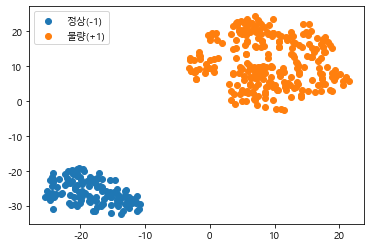

HBRG
SFPT


C:\Users\jkchoi\miniconda3\envs\ADD\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


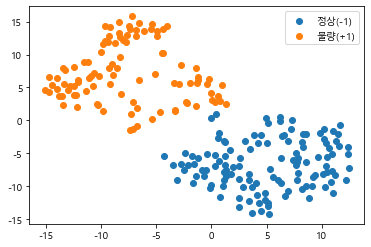

HBRG
GUDEONGI


C:\Users\jkchoi\miniconda3\envs\ADD\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


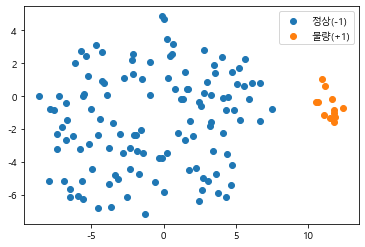

HBRG
SORA


C:\Users\jkchoi\miniconda3\envs\ADD\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


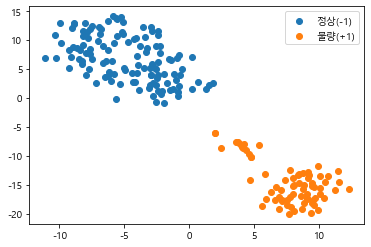

HBRG
RING


C:\Users\jkchoi\miniconda3\envs\ADD\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


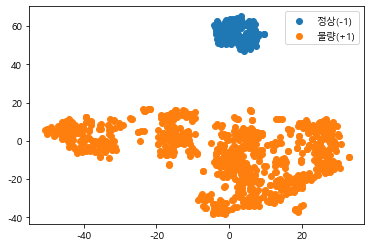

HBRG
SPOT


C:\Users\jkchoi\miniconda3\envs\ADD\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


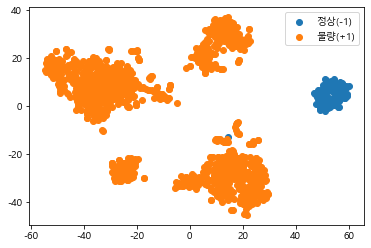

HBRG
BRG


C:\Users\jkchoi\miniconda3\envs\ADD\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


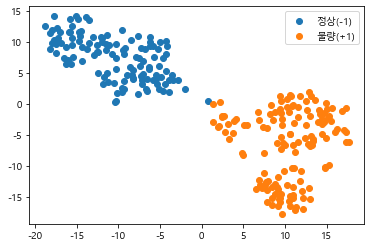

HBRG
L_MKBG


C:\Users\jkchoi\miniconda3\envs\ADD\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


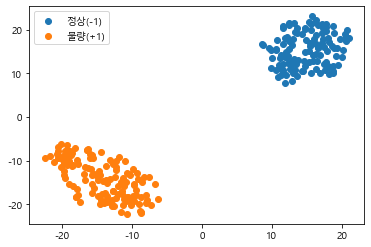

LSAC
SFPT


C:\Users\jkchoi\miniconda3\envs\ADD\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


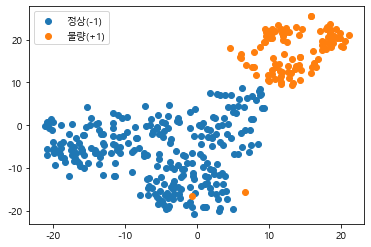

LSAC
GUDEONGI


C:\Users\jkchoi\miniconda3\envs\ADD\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


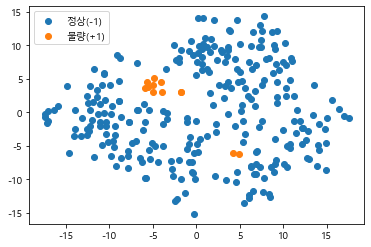

LSAC
SORA


C:\Users\jkchoi\miniconda3\envs\ADD\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


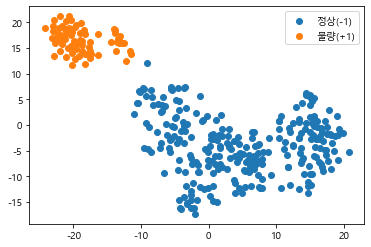

LSAC
RING


C:\Users\jkchoi\miniconda3\envs\ADD\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


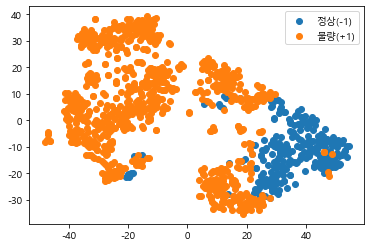

LSAC
SPOT


C:\Users\jkchoi\miniconda3\envs\ADD\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


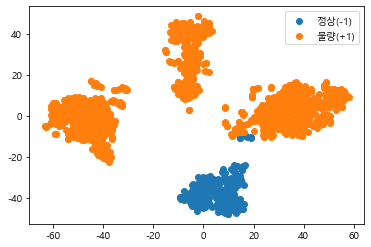

LSAC
BRG


C:\Users\jkchoi\miniconda3\envs\ADD\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


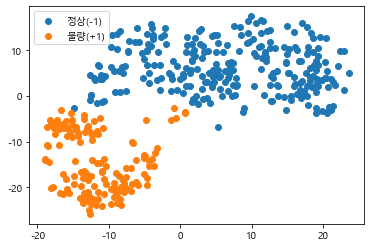

LSAC
L_MKBG


C:\Users\jkchoi\miniconda3\envs\ADD\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


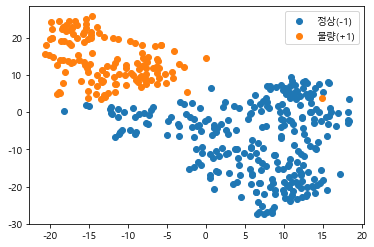

SFPT
GUDEONGI


C:\Users\jkchoi\miniconda3\envs\ADD\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


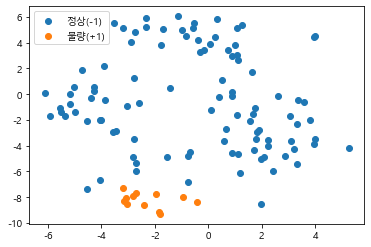

SFPT
SORA


C:\Users\jkchoi\miniconda3\envs\ADD\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


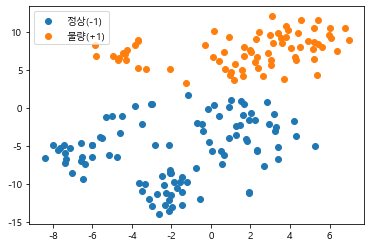

SFPT
RING


C:\Users\jkchoi\miniconda3\envs\ADD\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


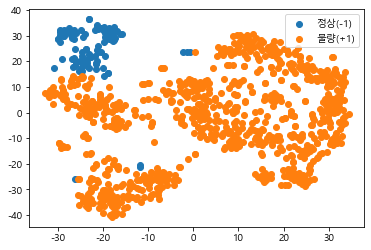

SFPT
SPOT


C:\Users\jkchoi\miniconda3\envs\ADD\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


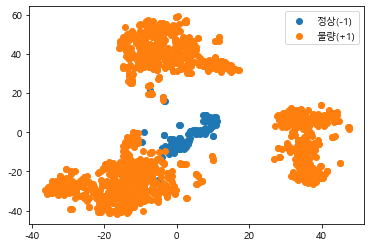

SFPT
BRG


C:\Users\jkchoi\miniconda3\envs\ADD\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


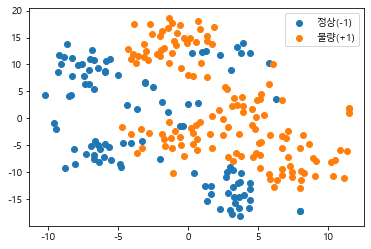

SFPT
L_MKBG


C:\Users\jkchoi\miniconda3\envs\ADD\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


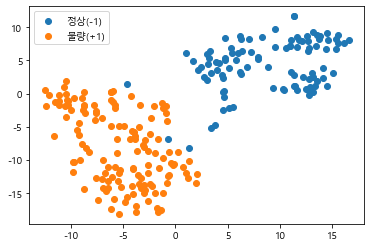

GUDEONGI
SORA


C:\Users\jkchoi\miniconda3\envs\ADD\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


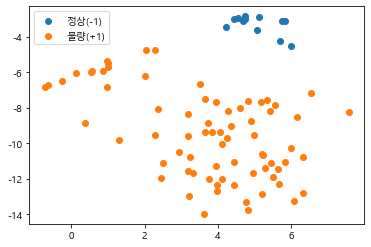

GUDEONGI
RING


C:\Users\jkchoi\miniconda3\envs\ADD\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


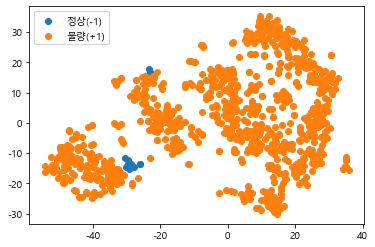

GUDEONGI
SPOT


C:\Users\jkchoi\miniconda3\envs\ADD\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


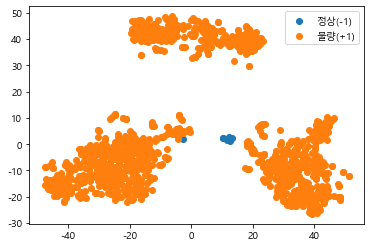

GUDEONGI
BRG


C:\Users\jkchoi\miniconda3\envs\ADD\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


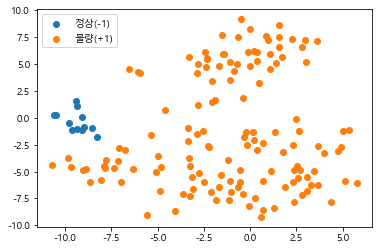

GUDEONGI
L_MKBG


C:\Users\jkchoi\miniconda3\envs\ADD\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


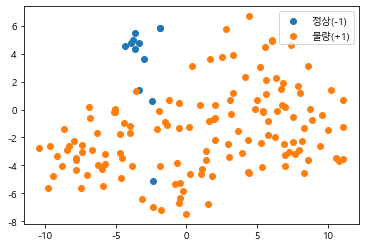

SORA
RING


C:\Users\jkchoi\miniconda3\envs\ADD\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


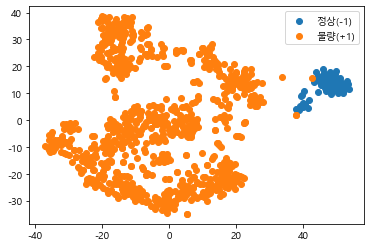

SORA
SPOT


C:\Users\jkchoi\miniconda3\envs\ADD\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [ ]:
col_list = Y.unique()
for A in range(len(col_list)):
    for B in range(A+1,len(col_list)):

        print(col_list[A])
        print(col_list[B])
        mask = (Y==col_list[A]) | (Y==col_list[B])
        X_embedded = TSNE(n_components=2,init='random').fit_transform(X[mask])
        
        plt.scatter(X_embedded[Y[mask]==col_list[A],0], X_embedded[Y[mask]==col_list[A],1],label = '정상(-1)')
        plt.scatter(X_embedded[Y[mask]==col_list[B],0], X_embedded[Y[mask]==col_list[B],1],label = "불량(+1)")
        plt.legend()
        plt.show()
        plt.close('all')